<html><div style="font-size:7pt">This notebook may contain text, code and images generated by artificial intelligence. Used model: claude-3-5-sonnet-20241022, vision model: claude-3-5-sonnet-20241022, endpoint: None, bia-bob version: 0.25.2.. It is good scientific practice to check the code and results it produces carefully. <a href="https://github.com/haesleinhuepf/bia-bob">Read more about code generation using bia-bob</a></div></html>

# Tag Statistics Analysis

This notebook analyzes the distribution of tags in the content resources. We will:
1. Load the content data
2. Extract all tags
3. Process and clean the tags
4. Analyze tag distribution
5. Visualize tag statistics

In [1]:
import sys
sys.path.append("../scripts/")
import pandas as pd
from generate_link_lists import all_content
import numpy as np
import matplotlib.pyplot as plt

## Load the content data

In [2]:
data = all_content("../resources/")
data["resources"][:3]

[{'authors': ['Elisabeth Kugler'],
  'name': 'Sharing Your Poster on Figshare: A Community Guide to How-To and Why',
  'proficiency_level': 'novice',
  'tags': ['Sharing', 'Research Data Management', 'include in DALIA'],
  'type': ['Blog Post'],
  'url': 'https://focalplane.biologists.com/2023/07/26/sharing-your-poster-on-figshare/',
  'uuid': '63067620-fda2-407d-97f4-2f7c78bd5f9c'},
 {'authors': ['Marcelo Zoccoler'],
  'license': 'CC-BY-4.0',
  'name': 'Running Deep-Learning Scripts in the BiA-PoL Omero Server',
  'proficiency_level': 'proficient',
  'tags': ['Python',
   'Artificial Intelligence',
   'Bioimage Analysis',
   'include in DALIA'],
  'type': ['Blog Post'],
  'url': 'https://biapol.github.io/blog/marcelo_zoccoler/omero_scripts/readme.html',
  'uuid': '9d158030-2d9c-41f5-b119-2878a9186e60'},
 {'authors': ['Robert Haase'],
  'license': 'CC-BY-4.0',
  'name': 'Browsing the Open Microscopy Image Data Resource with Python',
  'proficiency_level': 'competent',
  'tags': ['OMERO

In [5]:
# Define the tags you want to remove
tags_to_remove = ['include in DALIA', 'exclude from DALIA']

# Loop through all entries and remove specific tags
for entry in data["resources"]:
    if 'tags' in entry:
        # Filter out unwanted tags
        entry['tags'] = [tag for tag in entry['tags'] if tag not in tags_to_remove]

# Display the first entry to verify the changes
print("First entry after tag removal:")
print(data["resources"][0])

First entry after tag removal:
{'authors': ['Elisabeth Kugler'], 'name': 'Sharing Your Poster on Figshare: A Community Guide to How-To and Why', 'proficiency_level': 'novice', 'tags': ['Sharing', 'Research Data Management'], 'type': ['Blog Post'], 'url': 'https://focalplane.biologists.com/2023/07/26/sharing-your-poster-on-figshare/', 'uuid': '63067620-fda2-407d-97f4-2f7c78bd5f9c'}


## Extract all tags from the resources

In [6]:
tags = []
for d in data["resources"]:
    if "tags" in d.keys() and d["tags"] is not None:
        if isinstance(d["tags"], str):
            d["tags"] = [d["tags"]]
        tags.extend([t.lower() for t in d["tags"]])
print(f"Total number of tags (including duplicates): {len(tags)}")

Total number of tags (including duplicates): 1068


## Check unique tags

In [7]:
print(f"Total tags: {len(tags)}")
print(f"Unique tags: {len(np.unique(tags))}")

Total tags: 1068
Unique tags: 123


## Visualize tag distribution
Create a pie chart showing the distribution of tags that appear at least 3 times

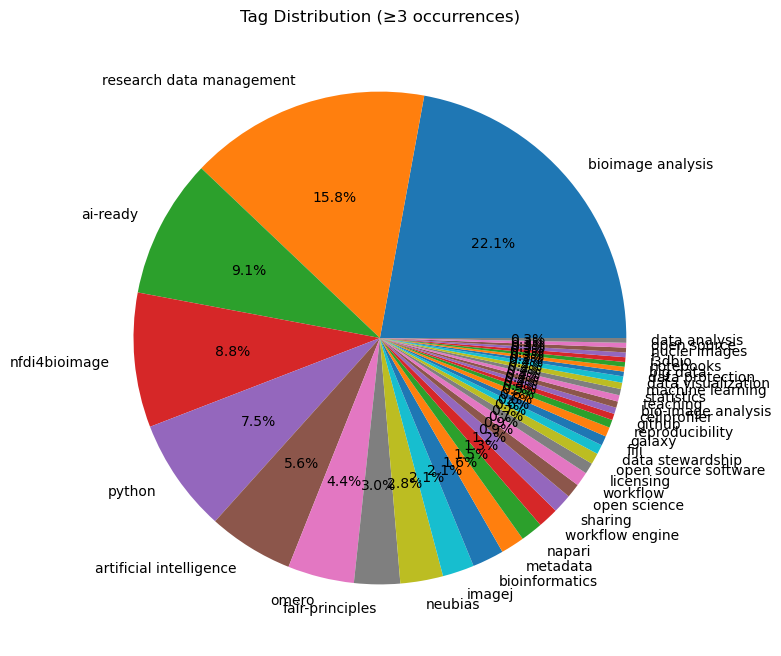


Most common tags and their counts:
bioimage analysis           213
research data management    152
ai-ready                     88
nfdi4bioimage                85
python                       72
artificial intelligence      54
omero                        42
fair-principles              29
neubias                      27
imagej                       20
bioinformatics               20
metadata                     15
napari                       14
workflow engine              13
sharing                      12
open science                  9
workflow                      9
licensing                     7
open source software          7
data stewardship              6
fiji                          6
galaxy                        6
reproducibility               5
github                        4
cellprofiler                  4
bio-image analysis            4
teaching                      4
statistics                    4
machine learning              4
data visualization            4
data

In [8]:
num_min_occurrences = 3

# Count tag occurrences
tag_counts = pd.Series(tags).value_counts()

# Filter tags with >=3 occurrences
tag_counts = tag_counts[tag_counts >= num_min_occurrences]

# Create pie chart
plt.figure(figsize=(12, 8))
plt.pie(tag_counts, labels=tag_counts.index, autopct='%1.1f%%')
plt.title(f'Tag Distribution (≥{num_min_occurrences} occurrences)')
plt.show()

# Print tag statistics
print(f"\nMost common tags and their counts:")
print(tag_counts)